In [1]:
import numpy as np
import pandas as pd
import folium
from folium import plugins
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [6]:
print(iris.data.shape)

(150, 4)


In [7]:
print(iris.target.shape)

(150,)


In [8]:
X = iris.data # feature matrix, note uppercase X as it a matrix
y = iris.target # response vector, hence lowercase y

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [16]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
testing = np.array([[3,5,4,2]])
testing2 = testing.reshape(1,-1)
knn.predict(testing2) 
# Alternatively testing2 = [[3,5,4,2]] # put double brackets

array([2])

In [23]:
test1 = np.array([3,5,4,2])
test1.shape # so four rows, which is incorrect dimension

(4,)

In [25]:
test2 = test1.reshape(1, -1)
test2.shape # so 1 row and 4 columns

(1, 4)

In [42]:
X_new = [[3,5,4,2],[5,4,3,2]] # works ok with list of lists
knn.predict(X_new) 

array([2, 1])

### use different k

In [53]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X,y)
knn5_y_pred = knn5.predict(X)
knn5.predict(X_new)

array([1, 1])

### Use different classification model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

In [48]:
logreg.predict(X_new)

array([2, 0])

### Model evaluation - whether Knn or LogisticRegression

In [49]:
# storing the prediction from logreg method for comparison
y_pred = logreg.predict(X)
len(y_pred)

150

In [50]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred)) # it will tell us 96% predictions were correct

0.96


In [54]:
print(metrics.accuracy_score(y,knn5_y_pred))

0.966666666667


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [59]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [60]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [61]:
# try k = 1 to 25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

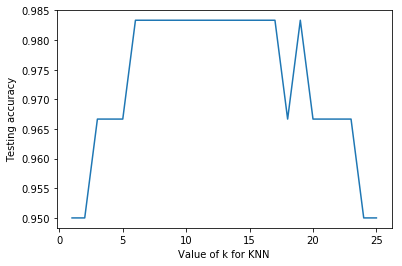

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')
plt.show()

In [64]:
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X, y)
knn11.predict([[3,5,4,2]])

array([1])